# Módulo 4 - Técnicas de Programação II
## Aula 5
- Gráficos com Plotly
- Exercícios

## Gráficos com Plotly
O módulo *plotly.express* (geralmente importado como px) contém funções que podem criar figuras inteiras de uma só vez e é chamado de Plotly Express ou PX. Plotly Express é uma parte interna da biblioteca plotly, e é o ponto de partida recomendado para a criação de figuras mais comuns. Cada função Plotly Express usa objetos de gráfico internamente e retorna uma instância plotly.graph_objects.Figure. Em toda a documentação de plotagem, você encontrará a maneira Plotly Express de construir figuras no topo de qualquer página aplicável, seguida por uma seção sobre como usar objetos de gráfico para construir figuras semelhantes. 
  
**Documentação**: https://plotly.com/python-api-reference/plotly.express.html

### Instalação
Caso não tenha instalado o pacote do **Plotly** ou está na dúvida, basta rodar o seguinte código:

In [ ]:
# !pip install plotly

### Import da biblioteca
  
Nos estudos referentes ao **Plotly** utilizaremos o submódulo *express*. Como padrão, damos o alias de *px*.

In [1]:
import plotly.express as px

Assim como foi feito no matplotlib, utilizaremos primeiramente exemplos didáticos com apenas duas listas de dados para exemplificarmos o uso das funções do pacote **plotly.express**.

In [2]:
x = [1, 2, 3, 4, 5 ,6]
y = [10, 5, 3, 4, 6, 8]
px.scatter(x=x, y=y)

Caso queira salvar o gráfico

In [ ]:
fig=px.scatter(x=x,y=y)
fig.write_html("scatter.html")

Repare que para simplificar o trabalho o plotly já inicia com uma figura e área de desenho padrão, que você não precisa definir, e assim o código para gerar um gráfico pode ser simplesmente.  
Além disso, há diversas funcionalidades para interação com o gráfico plotado.

Vamos importar também outros pacotes padrões

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Scatter (dispersão)
**Documentação**: https://plotly.com/python-api-reference/generated/plotly.express.scatter

In [4]:
x = [1, 2, 3, 4, 5 ,6]
y = [10, 5, 3, 4, 6, 8]
z = ['a', 'b', 'c', 'c', 'a', 'a']
px.scatter(x, y, color=z)

Importando o dataset dos pinguins

In [5]:
df_size = pd.read_csv('./data/penguins_size.csv')
df_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
px.scatter(data_frame=df_size, x='body_mass_g', y='culmen_depth_mm')

Vamos utilizar o matplotlib para obter o mesmo gráfico e assim podermos comparar visualmente as diferenças.

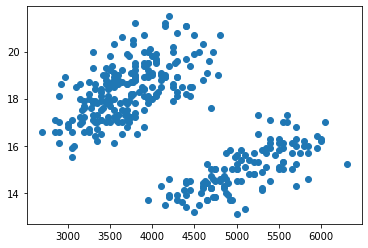

In [7]:
plt.scatter(x=df_size['body_mass_g'], y=df_size['culmen_depth_mm']);

Nota-se que a diferença visual entre os gráficos é enorme, porém a sintaxe que os gera não se diferencia tanto.

Podemos alterar as cores dos marcadores através de alguma variável do próprio dataframe como por exemplo o sexo dos pinguins.  
  
Por padrão o parâmetro *color* do px.scatter necessita de uma das colunas do próprio dataframe para realizar a marcação em cores das categorias.

In [8]:
df_size.dropna(inplace=True)
df_size['sex'].isnull().sum()

0

In [9]:
px.scatter(data_frame=df_size, x='body_mass_g', y='culmen_depth_mm', color='species')

Estilizando o gráfico.

In [10]:
fig=px.scatter(data_frame=df_size, x='body_mass_g', y='culmen_depth_mm', color='sex')
fig.update_layout(template='presentation')

In [12]:
fig=px.scatter(data_frame=df_size, x='body_mass_g', y='culmen_depth_mm', color='sex')

fig.update_layout(
    xaxis_title={
        'text':'Massa corporal em g',
        'font_size': 18
    },
    yaxis_title={
        'text': 'Altura do bico',
        'font_size': 18
    },
    legend_title={
        'text':'Sexo',
        'font_size': 18
    },
    font_color='grey',
    title={
        'text': 'Massa dos pinguins em função da altura do bico',
        'x': 0.5,
        'y': 0.93,
        'font_family': 'Times New Roman',
        'font_color': 'black',
        'font_size': 20
    },
    template='presentation'
)

Algumas strings que podem ser utilizadas no template:
- ‘ggplot2’,
- ‘seaborn’,
- ‘simple_white’,
- ‘plotly’,
- ‘plotly_white’,
- ‘plotly_dark’,
- ‘presentation’,
- ‘xgridoff’,
- ‘ygridoff’,
- ‘gridon’,
- ‘none’

## Linhas
**Documentação**: https://plotly.com/python-api-reference/generated/plotly.express.line

In [13]:
df_supermarket = pd.read_csv('.\data\supermarket_sales.csv')
df_supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [14]:
df_supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [15]:
df_supermarket['Date'] = pd.to_datetime(df_supermarket['Date'])

In [16]:
px.line(df_supermarket, 'Date', 'Total')

In [17]:
df_total=df_supermarket.pivot_table(index='Date', values='Total', aggfunc='sum')
fig=px.line(x=df_total.index, y=df_total['Total'])

fig.update_layout(
    xaxis_title={
        'text':'Data',
    },
    yaxis_title={
        'text': 'Total somado',
    },
    font_color='grey',
    title={
        'text': 'Total de vendas ao longo do tempo',
        'x': 0.5,
        'y': 0.93,
    },
    template='ggplot2'
)

**No mesmo Eixo**

In [18]:
df_payment=df_supermarket.pivot_table(index='Date', columns='Payment', values='Total', aggfunc='sum')
px.line(df_payment)

Podemos estilizar o gráfico

In [22]:
df_payment=df_supermarket.pivot_table(index='Date', columns='Payment', values='Total', aggfunc='sum')
# fig=px.line(df_payment, title='Vendas no supermercado por meio de pagamento')

fig.update_layout(xaxis_title=None,
    yaxis_title="Valor total vendido",
    legend_title="Método de Pagamento",
    title={
        'text': 'Vendas no supermercado por meio de pagamento',
        'y':0.85,
        'x':0.27,
        'font_family': 'Times New Roman',
        'font_color': 'black'
    })


**Em vários eixos**  
Para realizar o plot do gráfico acima, porém agora em três gráficos separados, o Plotly Express possui um parâmetro chamado *facet_col* e *facet_row* cujas funções é manter os gráficos em face com outros, seja pela linha (horizontal), seja pela coluna (vertical). Estes parâmetros necessitam de alguma coluna do DataFrame da qual será separado o gráfico, de forma semelhante como é feito utilizando o parâmetro color.

In [20]:
px.line(df_payment, facet_col='Payment')

Agora um exemplo do uso do *facet_row*, ou seja, uso dos gráficos em face horizontalmente.

In [23]:
fig=px.line(df_payment, facet_row='Payment', markers=True)

#função para retirada do texto padrão "Payment="
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(legend_title="Método de Pagamento")

## Pizza
**Documentação**: https://plotly.com/python-api-reference/generated/plotly.express.pie

In [24]:
df_pizza=df_supermarket.pivot_table(index='Branch', values='Quantity', aggfunc='sum')
px.pie(names=df_pizza.index, values=df_pizza['Quantity'], opacity=0.8)

In [25]:
fig=px.pie(names=df_pizza.index, values=df_pizza['Quantity'], opacity=0.8)

fig.update_layout(
    title={
        'text': 'Distribuição das quantidades de vendas por marca',
        'x': 0.5,
        'font_color': 'grey'
    }
)

## Barras
**Documentação**: https://plotly.com/python-api-reference/generated/plotly.express.bar.html

In [26]:
px.bar(df_pizza)

In [27]:
df_bar = df_supermarket.pivot_table(index='Branch', values='Total', columns='Gender', aggfunc='sum')
px.bar(df_bar)

In [28]:
df_bar = df_supermarket.pivot_table(index='Branch', values='Total', columns='Gender', aggfunc='sum')
fig = px.bar(df_bar)
fig.update_layout(
    xaxis_title="Marca",
    yaxis_title="Total de vendas (R$)",
    legend_title="Gênero",
    title={
        'text': 'Distribuição das vendas das marcas por gênero',
        'y':0.95,
        'x':0.5,
        'font_color': 'grey'
    })
fig.show()

In [29]:
df_bar = df_supermarket.pivot_table(index='Branch', values='Total', columns='Gender', aggfunc='sum')
fig = px.bar(df_bar, barmode='group')

fig.update_layout(
    xaxis_title="Marca",
    yaxis_title="Total de vendas (R$)",
    legend_title="Gênero",
    template='none',
    title={
        'text': 'Distribuição das vendas das marcas por gênero',
        'y':0.95,
        'x':0.5,
        'font_color': 'grey'
    }
)


In [30]:
df_bar = df_supermarket.pivot_table(index='Branch', values='Total', columns='Gender', aggfunc='sum')
fig = px.bar(df_bar, facet_col='Gender')

fig.update_layout(
    yaxis_title="Total de vendas (R$)",
    legend_title="Gênero",
    title={
        'text': 'Distribuição das vendas das marcas por gênero',
        'y':0.95,
        'x':0.5,
        'font_color': 'grey'
    })

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

**Barras Horizontais**
Para criar o gráfico de barras horizontais basta utilizar o parâmetro *orientation* como sendo 'h'

In [31]:
df_bar = df_supermarket.pivot_table(index='Branch', values='Total', columns='Gender', aggfunc='sum')
fig = px.bar(df_bar, orientation='h')
fig.update_layout(
    yaxis_title="Marca",
    xaxis_title="Total de vendas (R$)",
    legend_title="Gênero",
    title={
        'text': 'Distribuição das vendas das marcas por gênero',
        'y':0.95,
        'x':0.5,
        'font_color': 'grey'
    })
fig.show()

## Histograma
**Documentação**: https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html

In [32]:
px.histogram(df_size, 'body_mass_g', nbins=50)

In [33]:
px.histogram(df_size, 'body_mass_g', nbins=50, marginal='box', template='none')

## Boxplot
**Documentação**: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [34]:
fig=px.box(data_frame=df_size, y='body_mass_g')

fig.update_layout(
    yaxis_title='Massa corporal (g)',
    title={
        'text': 'Boxplot',
        'x': 0.49,
        'y': 0.94,
        'font_color': 'grey'
    },
    template='none'
)

In [35]:
fig=px.box(data_frame=df_size, x='body_mass_g')

fig.update_layout(
    xaxis_title='Massa corporal (g)',
    title={
        'text': 'Boxplot',
        'x': 0.49,
        'y': 0.94,
        'font_color': 'grey'
    },
    template='none'
)

Retomando o gráfico de dispersão do início da aula

In [36]:
px.scatter(data_frame=df_size, x='body_mass_g', y='culmen_depth_mm', )

É possível automaticamente concatenar gráficos

In [37]:
px.scatter(data_frame=df_size, x='body_mass_g', y='culmen_depth_mm', marginal_x='box', marginal_y='box')